# A tour of Machine Learning Classifiers using Scikit-Learn

## First steps with scikit-learn -- training a perceptron

In [1]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[: , (2 , 3)]
y = iris.target
print ('Class label:' , np.unique(y))

Class label: [0 1 2]


In [2]:
#splitting in test and train sets
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 1 , stratify = y)

In [3]:
#counting the number of occurence of each value
print ("Labels count in y:", np.bincount(y))
print ("Labels count in y_train:", np.bincount(y_train))
print ("Labels count in y_test:", np.bincount(y_test))

Labels count in y: [50 50 50]
Labels count in y_train: [35 35 35]
Labels count in y_test: [15 15 15]


In [4]:
#feature scaling for standardization using StandardScaler

from sklearn.preprocessing import StandardScaler #Loading StandardScaler from preprocessing module

sc = StandardScaler() #Initialized new StandardScaler object

sc.fit(X_train) #estimated mean and standard deviation for each featire dimension

X_train_std = sc.transform(X_train) #Standardized the training data using mean and standard deviation

X_test_std = sc.transform(X_test) #standardized the test data using mean and standard deviation

In [5]:
#training perceptron model
from sklearn.linear_model import Perceptron  #Loading the Perceptron from linear model

ppn = Perceptron(eta0 = 0.01, max_iter = 50, random_state=1)  #Initialized of the Perceptron object

ppn.fit(X_train_std, y_train)  #Trained the model via the fit method

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.01,
           fit_intercept=True, max_iter=50, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [6]:
#prediction of perceptron
y_pred = ppn.predict(X_test_std)
print("Misclassified samples: %d" %(y_test != y_pred).sum())

Misclassified samples: 2


In [7]:
#classification accuracy
from sklearn.metrics import accuracy_score
print("Accuracy: %.2f" %accuracy_score(y_test, y_pred))
print("Accuracy: %.2f" %ppn.score(X_test_std, y_test))

Accuracy: 0.96
Accuracy: 0.96


In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X , y , classifier ,test_idx = None , resolution = 0.02):
    #setup marker generator and colormap
    markers = ('s' , 'x' , 'o' , '^' , 'v')
    colors = ('red' , 'blue' , 'lightgreen' , 'gray' , 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot decision surfaces
    x1_min , x1_max = X[: , 0].min() - 1 , X[: , 0].max() + 1
    x2_min , x2_max = X[: , 1].min() - 1 , X[: , 1].max() + 1
    xx1 , xx2 = np.meshgrid(np.arange(x1_min , x1_max , resolution) , 
                            np.arange(x2_min , x2_max , resolution))
    z = classifier.predict(np.array([xx1.ravel() , xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1 , xx2 , z , alpha = 0.3 , cmap = cmap)
    plt.xlim(xx1.min() , xx1.max())
    plt.ylim(xx2.min() , xx2.max())
    
    for idx , cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl , 0] , y = X[y == cl , 1],
                    alpha = 0.8 , c = colors[idx] , 
                    marker = markers[idx] , label = cl , edgecolor = 'black')
    
    #highlight test sample
    if test_idx:
        #plot all samples
        X_test , y_test = X[test_idx , :] , y[test_idx]
    plt.scatter(X_test[:, 0], X_test[:, 1],                    
                c='', edgecolor='black', alpha=1.0,                    \
                linewidth=1, marker='o',                    
                s=100, label='test set')
    

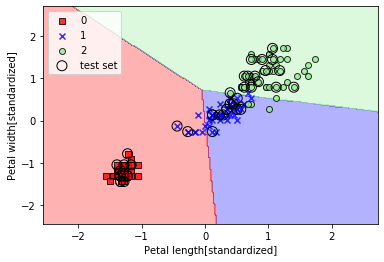

In [9]:
#marking the plots
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X = X_combined_std, y = y_combined, classifier= ppn, test_idx= range(105, 150))

plt.xlabel('Petal length[standardized]')
plt.ylabel('Petal width[standardized]')
plt.legend(loc = 'upper left')
plt.show()